## 7.4 池化层(pooling layer)

卷积神经网络只有卷积层这一种结构吗？不是的，下面我们就要介绍池化层。池化层是用来压缩信息的层。它将输入的多个特征映射到一个更小的特征空间中，从而使网络变得更加紧凑。

如果没有池化层，网络的参数数量就会变得非常大，这会导致训练时间变长，并且容易出现过拟合现象。池化层通过下采样的方式实现了信息的压缩，减少了网络的参数数量，这有助于缩短训练时间，并且可以防止过拟合。这里，下采样是指将输入的特征缩小为原来的一部分。此外，池化层还可以帮助网络学习更加抽象的特征，从而提升分类的准确率。总体而言，池化层在卷积神经网络中起到了信息压缩的作用，减少了参数的数量，防止过拟合，并且可以帮助网络学习更加抽象的特征。

### 7.4.1 常见池化方法

常见的下采样方法有最大池化和平均池化。最大池化层会选取输入特征中的最大值作为输出特征，平均池化层则是将输入特征求平均值作为输出特征。咱们分别用具体示例来加以说明其基本原理和具体步骤。

先用代码实现最大池化层，它将输入张量的每个 2x2 的窗口中的最大值取出来，然后组成一个新的 2x2 的张量。

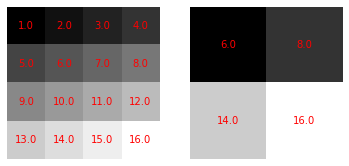

In [2]:
import torch
import matplotlib.pyplot as plt

# 创建一个 4x4 的二维张量，每一行代表一个图像的一行像素
input_tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# 将输入张量转化为浮点数类型的张量
input_tensor = input_tensor.to(torch.float)

# 将输入张量转化为四维张量，因为 MaxPool2d 需要接受四维的输入
input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)

# 将输入张量传入最大池化层，指定池化窗口的大小为 2x2，步长为 2
max_pooling_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)
output = max_pooling_layer(input_tensor)

# 使用 Matplotlib 绘制输入张量和输出张量
fig, axs = plt.subplots(1, 2)

# 绘制输入张量
axs[0].axis('off')
axs[0].imshow(input_tensor[0, 0].detach().numpy(),cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(input_tensor.shape[2]):
    for j in range(input_tensor.shape[3]):
        axs[0].text(j, i, input_tensor[0, 0, i, j].item(), ha="center", va="center", color="r")

# 绘制输出张量
axs[1].axis('off')
axs[1].imshow(output[0, 0].detach().numpy(),cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(output.shape[2]):
    for j in range(output.shape[3]):
        axs[1].text(j, i, output[0, 0, i, j].item(), ha="center", va="center", color="r")

plt.show()

在上文的代码中，我们对输入张量使用了一个最大池化层，指定了池化窗口的大小为 2x2，步长为 2。在这种情况下，最大池化层会在输入张量的每个通道中持续滑动一个 2x2 的窗口，并选取窗口中的最大值，作为输出张量对应位置的值。例如，在输入张量中，(0,0)位置的子区域为\begin{bmatrix}1&2&5&6\end{bmatrix}最大值为6，因此输出张量的(0,0)位置的值为6。池化窗口以步长2继续滑动，(0,1)位置的子区域为\begin{bmatrix}3&4&7&8\end{bmatrix}最大值为8，因此输出张量的(0,1)位置的值为8。以此类推...

再来看看平均池化操作的情况。

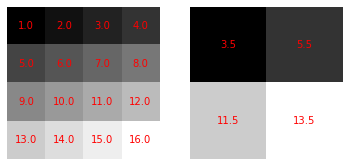

In [3]:
import matplotlib.pyplot as plt

# 将输入张量传入平均池化层，指定池化窗口的大小为 2x2，步长为 2
avg_pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
output = avg_pooling_layer(input_tensor)

# 使用 Matplotlib 可视化平均池化层的输入张量和输出张量
fig, axs = plt.subplots(1, 2)

# 绘制输入张量
axs[0].axis('off')
axs[0].imshow(input_tensor[0, 0, :, :].detach().numpy(), cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(input_tensor.shape[2]):
    for j in range(input_tensor.shape[3]):
        axs[0].text(j, i, input_tensor[0, 0, i, j].item(), ha="center", va="center", color="r")
        
# 绘制输出张量
axs[1].axis('off')
axs[1].imshow(output[0, 0, :, :].detach().numpy(), cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(output.shape[2]):
    for j in range(output.shape[3]):
        axs[1].text(j, i, output[0, 0, i, j].item(), ha="center", va="center", color="r")

plt.show()


在平均池化层中，输入张量与输出张量的结构与最大池化层相同，只是平均池化层在处理时，会将输入张量中每个2x2的子区域的值取平均值作为输出张量中相应位置的值。例如，在输入张量中，(0,0)位置的子区域为\begin{bmatrix}1&2&5&6\end{bmatrix}平均值为$\frac{1+2+5+6}{4}=\frac{14}{4}=3.5$，因此输出张量的(0,0)位置的值为3.5。

总的来说，最大池化层可以帮助网络学习更强的特征，而平均池化层可以帮助网络学习更平滑的特征。二者都可以帮助网络学习更强的特征，同时还可以防止过拟合。当然，池化层可能会丢失某些有用的信息，并且对噪声敏感。

### 7.4.2 池化填充和步长

在池化操作中，填充和步长（也可叫做步幅）是两个重要的概念，它们可以帮助控制池化层的输出大小。

填充是在池化运算之前添加的一些行和列，用于填充输入的边界。这有助于控制池化层的输出大小。例如，在池化层后使用全连接层时，可以使用填充来确保输入和输出大小相同。

步长是指在池化运算期间每次滑动的窗口的距离。步长越大，窗口在输入图像上的滑动距离就越大，这意味着输出的特征图就越小。步长越小，窗口在输入上的滑动距离就越小，这意味着输出的特征图就越大。

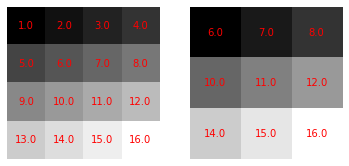

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 创建一个 4x4 的二维张量，每一行代表一个图像的一行像素
input_tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# 将输入张量转化为浮点数类型的张量
input_tensor = input_tensor.to(torch.float)

# 将输入张量转化为四维张量，因为 MaxPool2d 需要接受四维的输入
input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)

# 进行池化操作，使用2*2的滑动窗口，步幅为1，填充为0
max_pooling_layer = torch.nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
output = max_pooling_layer(input_tensor)

# 使用 Matplotlib 绘制输入张量和输出张量
fig, axs = plt.subplots(1, 2)

# 绘制输入张量
axs[0].axis('off')
axs[0].imshow(input_tensor[0, 0].detach().numpy(),cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(input_tensor.shape[2]):
    for j in range(input_tensor.shape[3]):
        axs[0].text(j, i, input_tensor[0, 0, i, j].item(), ha="center", va="center", color="r")

# 绘制输出张量
axs[1].axis('off')
axs[1].imshow(output[0, 0].detach().numpy(),cmap="gray")

# 在图像上为每个像素添加像素值的标签，使用红色显示
for i in range(output.shape[2]):
    for j in range(output.shape[3]):
        axs[1].text(j, i, output[0, 0, i, j].item(), ha="center", va="center", color="r")

plt.show()

填充（padding）指的是在图像的边缘外添加额外的像素，以便滑动窗口能够覆盖整个图像。步长（stride）指的是滑动窗口在图像上每次移动的距离。在上面的代码中，我们使用了填充值为0的池化层，因此在输入图像的边缘没有添加任何像素。我们也使用了步长值为1的池化层，因此滑动窗口每次都只移动一个像素。这意味着我们的滑动窗口在图像上每个位置都有一次机会，并且输出图像的大小和输入图像的大小相同。如果我们将填充值设置为1，则输出图像将比输入图像大2个像素；如果将步长值设置为2，则输出图像将比输入图像小2个像素。


### 7.4.3 池化多通道问题

在多个输入通道的情况下，池化层的输入称为多通道数据。池化层可以在每个通道上单独进行池化，也可以在所有通道上进行池化，并将池化结果在通道维度上进行拼接。

在多通道数据上进行池化时，通常使用同样的池化方式。例如，如果使用的是最大池化，则池化层会在每个通道上取出每个池化窗口内的最大值，然后将这些最大值拼接在一起。

在处理多通道数据时，池化层通常不会对通道维度进行扩展，也不会对通道维度进行下采样。因此，池化层的输出通道数与输入通道数相同。

[Next 7-5 卷积神经网络](./7-5%20卷积神经网络.ipynb)